# Bike Sharing

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

import statsmodels.api as sm  

from statsmodels.stats.outliers_influence import variance_inflation_factor

import scipy.stats as stats

from sklearn.metrics import r2_score

import warnings
warnings.filterwarnings("ignore")

Steps:
1. Reading and Understanding the Data
2. Visualising the Data
3. Data Preparation
4. Splitting the Data into Training and Testing Sets
5. Building a linear model
7. Residual Analysis of the train data
8. Making Predictions Using the Final Model
9. Model Evaluation

## Step 1: Reading and Understanding the Data
This this step we will read the data and understand various variables

In [2]:
bike = pd.read_csv("day.csv")

In [3]:
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
bike.shape

(730, 16)

In [5]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


*Note:*
- All variables except date is nummber field
- We can see that there are **no missing values**

In [6]:
bike.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


**Data dictionary:**
    
- instant: record index
- dteday : date
- season : season (1:spring, 2:summer, 3:fall, 4:winter)
- yr : year (0: 2018, 1:2019)
- mnth : month ( 1 to 12)
- holiday : weather day is a holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
- weekday : day of the week
- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
- weathersit : 
	- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
	- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
	- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
	- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
- temp : temperature in Celsius
- atemp: feeling temperature in Celsius
- hum: humidity
- windspeed: wind speed
- casual: count of casual users
- registered: count of registered users
- cnt: count of total rental bikes including both casual and registered

### Data cleaning

#### Filtering data

We can drop the following variable:
- `instant`: As it an index and wont contribute any in the model
- `dteday`: This is a redundant field as all the information of this field is present in other field like `yr`, `month`, etc
- `workingday`: As field like `holiday` and `weekday` covers this information
- `casual`: As we are just in interested in final `cnt`
- `registered`: As we are just in interested in final `cnt`

In [7]:
bike.drop(["instant", "dteday", "workingday", "casual", "registered"], axis=1, inplace=True)

In [8]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   weathersit  730 non-null    int64  
 6   temp        730 non-null    float64
 7   atemp       730 non-null    float64
 8   hum         730 non-null    float64
 9   windspeed   730 non-null    float64
 10  cnt         730 non-null    int64  
dtypes: float64(4), int64(7)
memory usage: 62.9 KB


#### Fixing invalid data

In [9]:
# Variable season should have only 4 value
bike.season.unique()

array([1, 2, 3, 4])

In [10]:
# Variable month should only 12 values
bike.mnth.unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

In [11]:
# Same for holiday, weekday, weathersit
print(bike.holiday.unique())
print(bike.weekday.unique())
print(bike.weathersit.unique())

[0 1]
[6 0 1 2 3 4 5]
[2 1 3]


All the categorical data are valid as per data dictionary

#### Outliers analysis of numeric variables

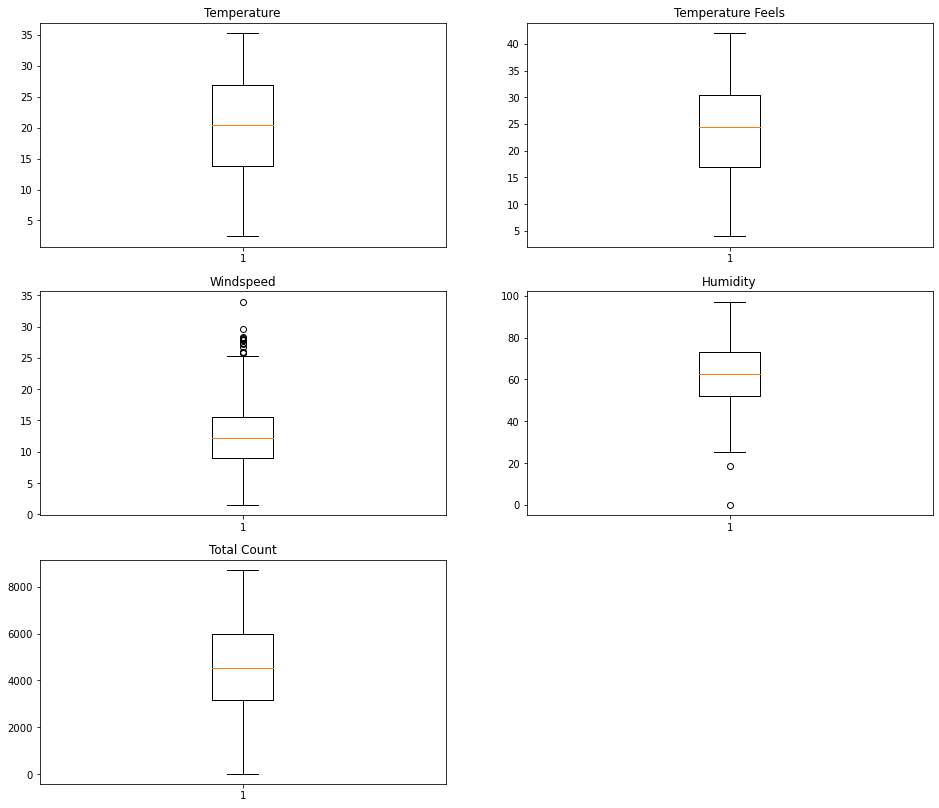

In [12]:
plt.figure(figsize=(16, 14))

plt.subplot(3, 2, 1)
plt.boxplot(bike.temp)
plt.title("Temperature")

plt.subplot(3, 2, 2)
plt.boxplot(bike.atemp)
plt.title("Temperature Feels")

plt.subplot(3, 2, 3)
plt.boxplot(bike.windspeed)
plt.title("Windspeed")

plt.subplot(3, 2, 4)
plt.boxplot(bike.hum)
plt.title("Humidity")

plt.subplot(3, 2, 5)
plt.boxplot(bike.cnt)
plt.title("Total Count")

plt.show()

The distribution does not have any notable outliers

## Step 2: Visualising the Data

#### Analyze numerical variables
Numerical variable can be analyzed using heatmap

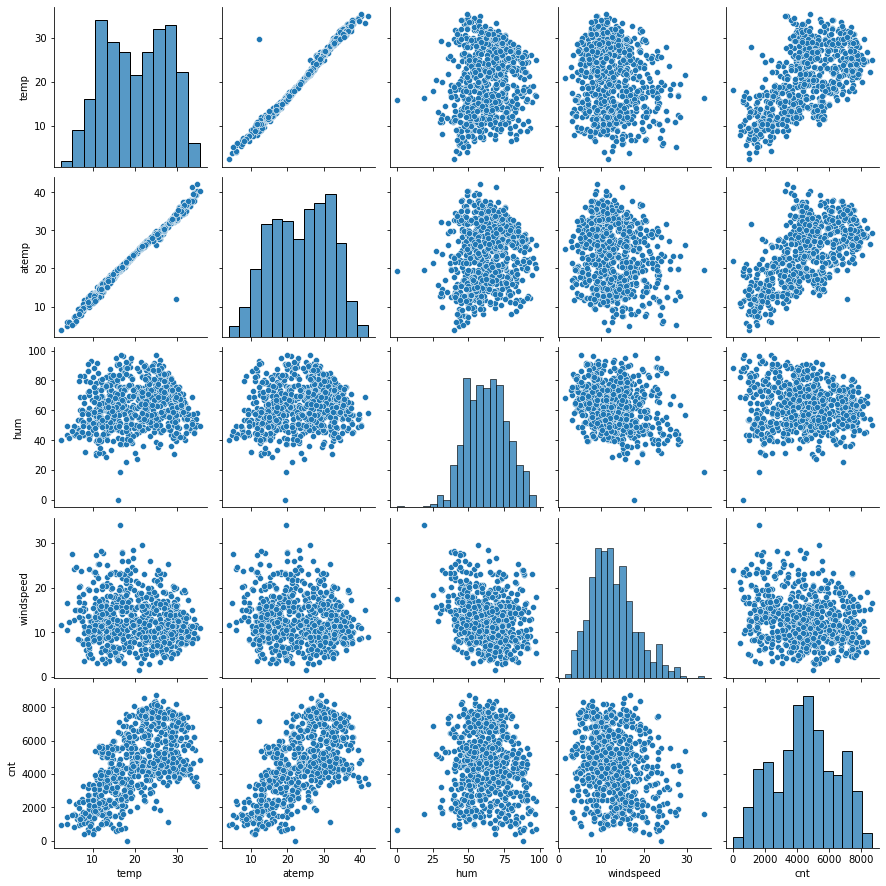

In [13]:
sns.pairplot(bike[['temp','atemp','hum','windspeed',"cnt"]])
plt.show()

*Note:*
- We can see that there is a weak relationship between `temp` and `cnt`
- `temp` and `atemp` has high relationship

Lets plot heatmap and see

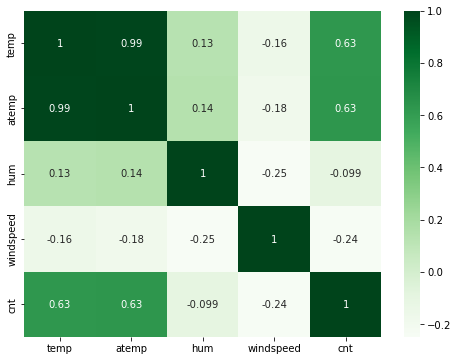

In [14]:
plt.figure(figsize=(8, 6))
sns.heatmap(bike[['temp','atemp','hum','windspeed',"cnt"]].corr(), annot=True, cmap="Greens")
plt.show()

*Note:*
- There is a weak negative correlation with cnt and windspeed

This a **usecase of linear regresssion** as there is a linear relationship with target variable `cnt` and other variables

Let's drop `atemp` as it has a very high relationship with `temp`, this implies all it's information can be given by `temp` variable

In [15]:
bike.drop("atemp", axis=1, inplace=True)

#### Analyzing categorical variables

Let's do box plot of categorical variables with cnt

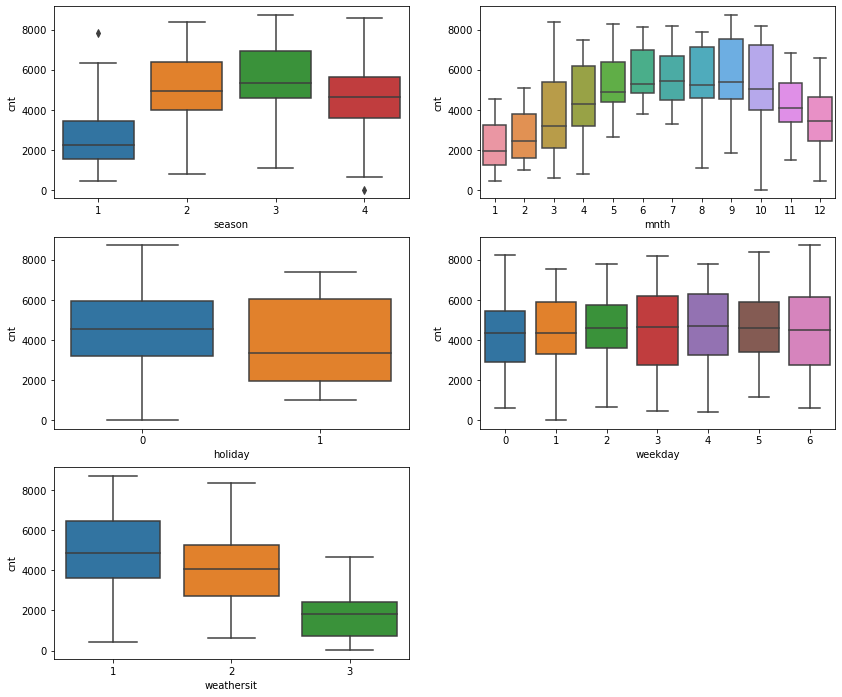

In [16]:
plt.figure(figsize=(14, 12))

plt.subplot(3, 2, 1)
sns.boxplot(x="season", y="cnt", data=bike)

plt.subplot(3, 2, 2)
sns.boxplot(x="mnth", y="cnt", data=bike)

plt.subplot(3, 2, 3)
sns.boxplot(x="holiday", y="cnt", data=bike)

plt.subplot(3, 2, 4)
sns.boxplot(x="weekday", y="cnt", data=bike)

plt.subplot(3, 2, 5)
sns.boxplot(x="weathersit", y="cnt", data=bike)

plt.show()

*Note:*
- We can see that the season summer and fall have a higher `cnt` count
- Month of have June and July have a higher count
- Similarly if it's not a holiday then the count is higher, implying people use bike for office/school commute
- Clear sky weather favours a higher share count

## Step 3: Data Preparation

In [17]:
bike.head()

,season,yr,mnth,holiday,weekday,weathersit,temp,hum,windspeed,cnt
0,1,0,1,0,6,2,14.110847,80.5833,10.749882,985
1,1,0,1,0,0,2,14.902598,69.6087,16.652113,801
2,1,0,1,0,1,1,8.050924,43.7273,16.636703,1349
3,1,0,1,0,2,1,8.200000,59.0435,10.739832,1562
4,1,0,1,0,3,1,9.305237,43.6957,12.522300,1600


#### Creating dummy variables

In [18]:
# Converting to text for creating dummy variables
bike['season'].replace({1:"spring",2:"summer",3:"fall",4:"winter"},inplace=True)
bike['weathersit'].replace({1:'clear',2:'misty_cloudy',3:'light+precipitation',4:'heavy_precipitation'}, inplace=True)
bike['weekday'].replace({0:"sun",1:"mon",2:"tues",3:"wed",4:"thur",5:"fri",6:"sat"},inplace=True)
bike['mnth'].replace({1:"jan",2:"feb",3:"mar",4:"apr",5:"may",6:"june",7:"july",8:"aug",9:"sept",10:"oct",11:"nov",12:"dec"},inplace=True)

In [19]:
bike.head()

,season,yr,mnth,holiday,weekday,weathersit,temp,hum,windspeed,cnt
0,spring,0,jan,0,sat,misty_cloudy,14.110847,80.5833,10.749882,985
1,spring,0,jan,0,sun,misty_cloudy,14.902598,69.6087,16.652113,801
2,spring,0,jan,0,mon,clear,8.050924,43.7273,16.636703,1349
3,spring,0,jan,0,tues,clear,8.200000,59.0435,10.739832,1562
4,spring,0,jan,0,wed,clear,9.305237,43.6957,12.522300,1600


In [20]:
Season = pd.get_dummies(bike['season'],drop_first=True)
Weather = pd.get_dummies(bike['weathersit'],drop_first=True)
Weekday = pd.get_dummies(bike['weekday'],drop_first=True)
Month = pd.get_dummies(bike['mnth'],drop_first=True)

bike = pd.concat([bike, Season, Weather, Weekday, Month], axis=1)

In [21]:
bike.drop(['season', 'weathersit', 'weekday', 'mnth'], axis=1, inplace=True)

In [22]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   yr                   730 non-null    int64  
 1   holiday              730 non-null    int64  
 2   temp                 730 non-null    float64
 3   hum                  730 non-null    float64
 4   windspeed            730 non-null    float64
 5   cnt                  730 non-null    int64  
 6   spring               730 non-null    uint8  
 7   summer               730 non-null    uint8  
 8   winter               730 non-null    uint8  
 9   light+precipitation  730 non-null    uint8  
 10  misty_cloudy         730 non-null    uint8  
 11  mon                  730 non-null    uint8  
 12  sat                  730 non-null    uint8  
 13  sun                  730 non-null    uint8  
 14  thur                 730 non-null    uint8  
 15  tues                 730 non-null    uin

In [23]:
bike.head()

,yr,holiday,temp,hum,windspeed,cnt,spring,summer,winter,light+precipitation,...,dec,feb,jan,july,june,mar,may,nov,oct,sept
0,0,0,14.110847,80.5833,10.749882,985,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,14.902598,69.6087,16.652113,801,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,0,0,8.050924,43.7273,16.636703,1349,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,8.200000,59.0435,10.739832,1562,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,0,0,9.305237,43.6957,12.522300,1600,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0


#### Splitting the train and test data

In [24]:
df_train, df_test = train_test_split(bike, train_size = 0.7, random_state = 100)

In [25]:
print(df_train.shape)
print(df_test.shape)

(510, 28)
(220, 28)


#### Rescaling variables

Let's use MinMax scalar to conver the range of variables between 0 and 1

In [26]:
rescale_vars = ['temp', 'hum', 'windspeed', 'cnt']
scaler = MinMaxScaler()
df_train[rescale_vars] = scaler.fit_transform(df_train[rescale_vars])

In [27]:
df_train.describe()

,yr,holiday,temp,hum,windspeed,cnt,spring,summer,winter,light+precipitation,...,dec,feb,jan,july,june,mar,may,nov,oct,sept
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.537440,0.650480,0.320883,0.513499,0.243137,0.247059,0.247059,0.029412,...,0.084314,0.066667,0.088235,0.076471,0.076471,0.098039,0.084314,0.086275,0.084314,0.080392
std,0.500429,0.157763,0.225858,0.145846,0.169803,0.224421,0.429398,0.431725,0.431725,0.169124,...,0.278131,0.249689,0.283915,0.266010,0.266010,0.297660,0.278131,0.281045,0.278131,0.272166
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.339853,0.538643,0.199179,0.356420,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.542596,0.653714,0.296763,0.518638,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,0.735215,0.754830,0.414447,0.684710,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Looks like the scaling is done well

#### Splitting X and y

In [28]:
y_train = df_train.pop("cnt")
X_train = df_train

In [29]:
X_train.shape

(510, 27)

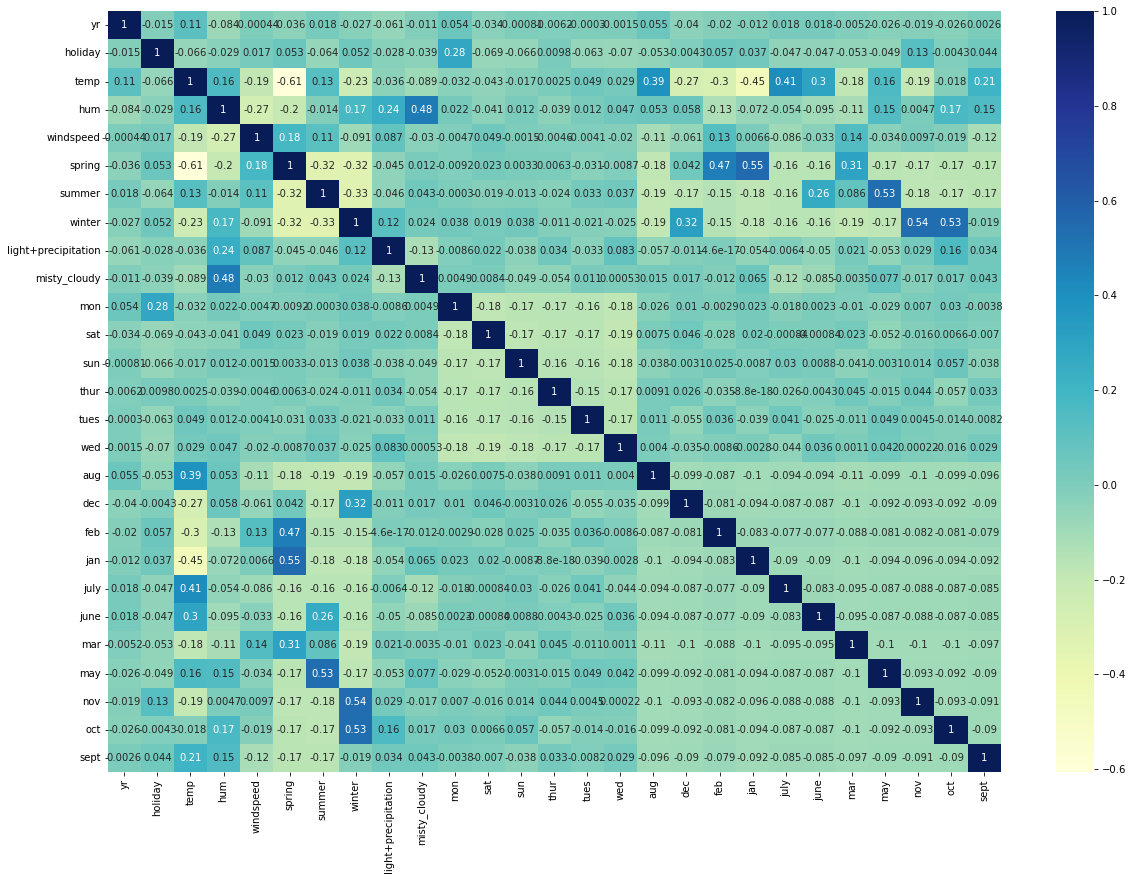

In [30]:
plt.figure(figsize = (20, 14))
sns.heatmap(X_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

Few variables are correlated like if humidity is there then the weather is cloudy. Similarly when spring is there the month is Jan/Feb. These are all expected. We'll filter these out as a part of feature selection

## Step 4: Feature selection and model building

As we can see that the data as 27 feature and quite a few of them are correlated which creates multicollinearity. 

We can eliminate the unimportant features first by using automated way then we'll use the manually way of elimination

#### Eliminate features

In [31]:
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 15)             # running RFE with 15 var
rfe = rfe.fit(X_train, y_train)

In [32]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1),
 ('light+precipitation', True, 1),
 ('misty_cloudy', True, 1),
 ('mon', False, 6),
 ('sat', False, 13),
 ('sun', True, 1),
 ('thur', False, 8),
 ('tues', False, 7),
 ('wed', False, 10),
 ('aug', False, 5),
 ('dec', False, 2),
 ('feb', False, 3),
 ('jan', True, 1),
 ('july', True, 1),
 ('june', False, 11),
 ('mar', False, 12),
 ('may', False, 4),
 ('nov', True, 1),
 ('oct', False, 9),
 ('sept', True, 1)]

Let's remove all the feature which has non-one ranking

In [33]:
col = X_train.columns[rfe.support_]
X_train_rfe = X_train[col]

In [34]:
X_train_rfe.shape

(510, 15)

#### Building a model

In [35]:
X_train_rfe = sm.add_constant(X_train_rfe)

In [36]:
lm = sm.OLS(y_train,X_train_rfe).fit()

In [37]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     184.5
Date:                Sat, 11 Jun 2022   Prob (F-statistic):          2.44e-191
Time:                        16:52:15   Log-Likelihood:                 520.21
No. Observations:                 510   AIC:                            -1008.
Df Residuals:                     494   BIC:                            -940.7
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.3047      0.035      8.770      0.000       0.236       0.373
yr                      0.2303      0.008     28.821      0.000       0.215       0.246
holiday                -0.0992      0.025     -3.911      0.000      -0.149      -0.049
temp                    0.5023      0.035     14.488      0.000       0.434       0.570
hum                    -0.1592      0.037     -4.271      0.000      -0.232      -0.086
windspeed              -0.1838      0.025     -7.220      0.000      -0.234      -0.134
spring                 -0.0552      0.021     -2.644      0.008      -0.096      -0.014
summer                  0.0484      0.015      3.247      0.001       0.019       0.078
winter                  0.0989      0.018      5.603      0.000       0.064       0.134
light+precipitation    -0.2483      0.026     -9.545      0.000      -0.299      -0.197
misty_cloudy           -0.0563      0.010     -5.448      0.000      -0.077      -0.036
sun                    -0.0453      0.011     -4.002      0.000      -0.068      -0.023
jan                    -0.0351      0.017     -2.026      0.043      -0.069      -0.001
july                   -0.0529      0.018     -2.934      0.004      -0.088      -0.017
nov                    -0.0239      0.017     -1.397      0.163      -0.057       0.010
sept                    0.0790      0.017      4.773      0.000       0.046       0.111
==============================================================================
Omnibus:                       64.570   Durbin-Watson:                   2.070
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              163.609
Skew:                          -0.646   Prob(JB):                     2.97e-36
Kurtosis:                       5.456   Cond. No.                         20.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

*Note:*
- Looks like we got a good model of **R2 = 0.854** and **R2-adj = 0.850**
- Also **p-values** for all the variables are almost **zero**, implying that all the variables are contributing well to the model
- **P(F-stat) = zero**, we can say that the **model is significant**

##### Check VIF

Let calculate VIF to see if variables have multicolinearity or not

In [38]:
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,78.35
6,spring,5.20
3,temp,3.97
8,winter,3.76
7,summer,2.68
4,hum,1.91
10,misty_cloudy,1.57
12,jan,1.57
13,july,1.49
14,nov,1.49


##### `const` has **VIF = 66.7**. Let drop it

In [39]:
X_train_rfe.drop(["const"], axis=1, inplace=True)

Lets re-evaluate the model

In [40]:
lm = sm.OLS(y_train,X_train_rfe).fit()

In [41]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                    cnt   R-squared (uncentered):                   0.972
Model:                            OLS   Adj. R-squared (uncentered):              0.971
Method:                 Least Squares   F-statistic:                              1145.
Date:                Sat, 11 Jun 2022   Prob (F-statistic):                        0.00
Time:                        16:52:31   Log-Likelihood:                          483.32
No. Observations:                 510   AIC:                                     -936.6
Df Residuals:                     495   BIC:                                     -873.1
Df Model:                          15                                                  
Covariance Type:            nonrobust                                                  
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
yr                      0.2370      0.009     27.731      0.000       0.220       0.254
holiday                -0.1006      0.027     -3.694      0.000      -0.154      -0.047
temp                    0.6861      0.030     23.139      0.000       0.628       0.744
hum                     0.0100      0.034      0.292      0.771      -0.057       0.077
windspeed              -0.0978      0.025     -3.876      0.000      -0.147      -0.048
spring                  0.0552      0.018      3.090      0.002       0.020       0.090
summer                  0.1089      0.014      7.676      0.000       0.081       0.137
winter                  0.1754      0.016     10.635      0.000       0.143       0.208
light+precipitation    -0.2860      0.028    -10.382      0.000      -0.340      -0.232
misty_cloudy           -0.0736      0.011     -6.746      0.000      -0.095      -0.052
sun                    -0.0442      0.012     -3.639      0.000      -0.068      -0.020
jan                    -0.0079      0.018     -0.431      0.667      -0.044       0.028
july                   -0.0354      0.019     -1.841      0.066      -0.073       0.002
nov                    -0.0026      0.018     -0.141      0.888      -0.038       0.033
sept                    0.1002      0.018      5.704      0.000       0.066       0.135
==============================================================================
Omnibus:                       62.875   Durbin-Watson:                   2.106
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              125.229
Skew:                          -0.710   Prob(JB):                     6.41e-28
Kurtosis:                       4.969   Cond. No.                         14.3
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

##### `jan` has p-value of 0.4, lets drop and re-evaluate the model 

In [42]:
X_train_rfe.drop(["jan"], axis=1, inplace=True)

In [43]:
lm = sm.OLS(y_train,X_train_rfe).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                    cnt   R-squared (uncentered):                   0.972
Model:                            OLS   Adj. R-squared (uncentered):              0.971
Method:                 Least Squares   F-statistic:                              1228.
Date:                Sat, 11 Jun 2022   Prob (F-statistic):                        0.00
Time:                        16:52:52   Log-Likelihood:                          483.22
No. Observations:                 510   AIC:                                     -938.4
Df Residuals:                     496   BIC:                                     -879.2
Df Model:                          14                                                  
Covariance Type:            nonrobust                                                  
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
yr                      0.2367      0.009     27.786      0.000       0.220       0.253
holiday                -0.1008      0.027     -3.704      0.000      -0.154      -0.047
temp                    0.6887      0.029     23.734      0.000       0.632       0.746
hum                     0.0073      0.034      0.216      0.829      -0.059       0.073
windspeed              -0.0974      0.025     -3.866      0.000      -0.147      -0.048
spring                  0.0531      0.017      3.093      0.002       0.019       0.087
summer                  0.1090      0.014      7.695      0.000       0.081       0.137
winter                  0.1760      0.016     10.719      0.000       0.144       0.208
light+precipitation    -0.2851      0.027    -10.389      0.000      -0.339      -0.231
misty_cloudy           -0.0734      0.011     -6.741      0.000      -0.095      -0.052
sun                    -0.0442      0.012     -3.636      0.000      -0.068      -0.020
july                   -0.0360      0.019     -1.876      0.061      -0.074       0.002
nov                    -0.0025      0.018     -0.138      0.890      -0.038       0.033
sept                    0.1002      0.018      5.706      0.000       0.066       0.135
==============================================================================
Omnibus:                       62.918   Durbin-Watson:                   2.104
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              125.532
Skew:                          -0.710   Prob(JB):                     5.51e-28
Kurtosis:                       4.973   Cond. No.                         14.1
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

##### `windspeed` has p-value of 0.189, lets drop and re-evaluate the model 

In [44]:
X_train_rfe.drop(["windspeed"], axis=1, inplace=True)

In [45]:
lm = sm.OLS(y_train,X_train_rfe).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                    cnt   R-squared (uncentered):                   0.971
Model:                            OLS   Adj. R-squared (uncentered):              0.970
Method:                 Least Squares   F-statistic:                              1286.
Date:                Sat, 11 Jun 2022   Prob (F-statistic):                        0.00
Time:                        16:53:27   Log-Likelihood:                          475.65
No. Observations:                 510   AIC:                                     -925.3
Df Residuals:                     497   BIC:                                     -870.3
Df Model:                          13                                                  
Covariance Type:            nonrobust                                                  
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
yr                      0.2358      0.009     27.311      0.000       0.219       0.253
holiday                -0.1023      0.028     -3.706      0.000      -0.156      -0.048
temp                    0.6522      0.028     23.443      0.000       0.598       0.707
hum                     0.0219      0.034      0.647      0.518      -0.045       0.088
spring                  0.0207      0.015      1.363      0.173      -0.009       0.051
summer                  0.0887      0.013      6.649      0.000       0.062       0.115
winter                  0.1593      0.016      9.917      0.000       0.128       0.191
light+precipitation    -0.3012      0.027    -10.956      0.000      -0.355      -0.247
misty_cloudy           -0.0767      0.011     -6.965      0.000      -0.098      -0.055
sun                    -0.0454      0.012     -3.687      0.000      -0.070      -0.021
july                   -0.0384      0.019     -1.974      0.049      -0.077      -0.000
nov                    -0.0102      0.018     -0.557      0.578      -0.046       0.026
sept                    0.0970      0.018      5.454      0.000       0.062       0.132
==============================================================================
Omnibus:                       67.502   Durbin-Watson:                   2.070
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              148.346
Skew:                          -0.722   Prob(JB):                     6.12e-33
Kurtosis:                       5.213   Cond. No.                         13.0
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

##### `dec` has p-value of 0.157, lets drop and re-evaluate the model 

In [46]:
X_train_rfe.drop(["dec"], axis=1, inplace=True)

KeyError: "['dec'] not found in axis"

In [47]:
lm = sm.OLS(y_train,X_train_rfe).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                    cnt   R-squared (uncentered):                   0.971
Model:                            OLS   Adj. R-squared (uncentered):              0.970
Method:                 Least Squares   F-statistic:                              1286.
Date:                Sat, 11 Jun 2022   Prob (F-statistic):                        0.00
Time:                        16:53:37   Log-Likelihood:                          475.65
No. Observations:                 510   AIC:                                     -925.3
Df Residuals:                     497   BIC:                                     -870.3
Df Model:                          13                                                  
Covariance Type:            nonrobust                                                  
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
yr                      0.2358      0.009     27.311      0.000       0.219       0.253
holiday                -0.1023      0.028     -3.706      0.000      -0.156      -0.048
temp                    0.6522      0.028     23.443      0.000       0.598       0.707
hum                     0.0219      0.034      0.647      0.518      -0.045       0.088
spring                  0.0207      0.015      1.363      0.173      -0.009       0.051
summer                  0.0887      0.013      6.649      0.000       0.062       0.115
winter                  0.1593      0.016      9.917      0.000       0.128       0.191
light+precipitation    -0.3012      0.027    -10.956      0.000      -0.355      -0.247
misty_cloudy           -0.0767      0.011     -6.965      0.000      -0.098      -0.055
sun                    -0.0454      0.012     -3.687      0.000      -0.070      -0.021
july                   -0.0384      0.019     -1.974      0.049      -0.077      -0.000
nov                    -0.0102      0.018     -0.557      0.578      -0.046       0.026
sept                    0.0970      0.018      5.454      0.000       0.062       0.132
==============================================================================
Omnibus:                       67.502   Durbin-Watson:                   2.070
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              148.346
Skew:                          -0.722   Prob(JB):                     6.12e-33
Kurtosis:                       5.213   Cond. No.                         13.0
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

##### `nov` has p-value of 0.238, lets drop and re-evaluate the model 

In [48]:
X_train_rfe.drop(["nov"], axis=1, inplace=True)

In [49]:
lm = sm.OLS(y_train,X_train_rfe).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                    cnt   R-squared (uncentered):                   0.971
Model:                            OLS   Adj. R-squared (uncentered):              0.970
Method:                 Least Squares   F-statistic:                              1395.
Date:                Sat, 11 Jun 2022   Prob (F-statistic):                        0.00
Time:                        16:53:40   Log-Likelihood:                          475.49
No. Observations:                 510   AIC:                                     -927.0
Df Residuals:                     498   BIC:                                     -876.2
Df Model:                          12                                                  
Covariance Type:            nonrobust                                                  
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
yr                      0.2357      0.009     27.325      0.000       0.219       0.253
holiday                -0.1042      0.027     -3.807      0.000      -0.158      -0.050
temp                    0.6528      0.028     23.501      0.000       0.598       0.707
hum                     0.0212      0.034      0.626      0.531      -0.045       0.088
spring                  0.0210      0.015      1.385      0.167      -0.009       0.051
summer                  0.0888      0.013      6.660      0.000       0.063       0.115
winter                  0.1559      0.015     10.492      0.000       0.127       0.185
light+precipitation    -0.3006      0.027    -10.950      0.000      -0.355      -0.247
misty_cloudy           -0.0765      0.011     -6.955      0.000      -0.098      -0.055
sun                    -0.0454      0.012     -3.690      0.000      -0.070      -0.021
july                   -0.0385      0.019     -1.979      0.048      -0.077      -0.000
sept                    0.0979      0.018      5.527      0.000       0.063       0.133
==============================================================================
Omnibus:                       66.351   Durbin-Watson:                   2.073
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              144.028
Skew:                          -0.715   Prob(JB):                     5.30e-32
Kurtosis:                       5.176   Cond. No.                         12.9
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

##### Let's compute the VIFs

In [50]:
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,27.92
2,temp,14.39
4,spring,3.07
6,winter,2.99
5,summer,2.41
8,misty_cloudy,2.29
0,yr,2.07
10,july,1.59
11,sept,1.38
7,light+precipitation,1.22


##### `hum` has VIF of 22.96, lets drop and re-evaluate the model 

In [51]:
X_train_rfe.drop(["hum"], axis=1, inplace=True)

In [52]:
lm = sm.OLS(y_train,X_train_rfe).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                    cnt   R-squared (uncentered):                   0.971
Model:                            OLS   Adj. R-squared (uncentered):              0.970
Method:                 Least Squares   F-statistic:                              1523.
Date:                Sat, 11 Jun 2022   Prob (F-statistic):                        0.00
Time:                        16:53:42   Log-Likelihood:                          475.29
No. Observations:                 510   AIC:                                     -928.6
Df Residuals:                     499   BIC:                                     -882.0
Df Model:                          11                                                  
Covariance Type:            nonrobust                                                  
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
yr                      0.2353      0.009     27.365      0.000       0.218       0.252
holiday                -0.1039      0.027     -3.799      0.000      -0.158      -0.050
temp                    0.6674      0.015     44.128      0.000       0.638       0.697
spring                  0.0280      0.010      2.707      0.007       0.008       0.048
summer                  0.0925      0.012      7.724      0.000       0.069       0.116
winter                  0.1622      0.011     14.918      0.000       0.141       0.184
light+precipitation    -0.2946      0.026    -11.455      0.000      -0.345      -0.244
misty_cloudy           -0.0726      0.009     -8.014      0.000      -0.090      -0.055
sun                    -0.0447      0.012     -3.652      0.000      -0.069      -0.021
july                   -0.0385      0.019     -1.982      0.048      -0.077      -0.000
sept                    0.0999      0.017      5.744      0.000       0.066       0.134
==============================================================================
Omnibus:                       66.215   Durbin-Watson:                   2.073
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              142.037
Skew:                          -0.717   Prob(JB):                     1.44e-31
Kurtosis:                       5.151   Cond. No.                         6.57
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

##### `spring` has p-value of 0.618, lets drop and re-evaluate the model 

In [53]:
X_train_rfe.drop(["spring"], axis=1, inplace=True)

In [54]:
lm = sm.OLS(y_train,X_train_rfe).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                    cnt   R-squared (uncentered):                   0.971
Model:                            OLS   Adj. R-squared (uncentered):              0.970
Method:                 Least Squares   F-statistic:                              1654.
Date:                Sat, 11 Jun 2022   Prob (F-statistic):                        0.00
Time:                        16:53:56   Log-Likelihood:                          471.57
No. Observations:                 510   AIC:                                     -923.1
Df Residuals:                     500   BIC:                                     -880.8
Df Model:                          10                                                  
Covariance Type:            nonrobust                                                  
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
yr                      0.2407      0.008     28.601      0.000       0.224       0.257
holiday                -0.0947      0.027     -3.468      0.001      -0.148      -0.041
temp                    0.6756      0.015     45.300      0.000       0.646       0.705
summer                  0.0817      0.011      7.190      0.000       0.059       0.104
winter                  0.1529      0.010     14.733      0.000       0.132       0.173
light+precipitation    -0.2884      0.026    -11.189      0.000      -0.339      -0.238
misty_cloudy           -0.0664      0.009     -7.529      0.000      -0.084      -0.049
sun                    -0.0398      0.012     -3.268      0.001      -0.064      -0.016
july                   -0.0504      0.019     -2.650      0.008      -0.088      -0.013
sept                    0.0897      0.017      5.250      0.000       0.056       0.123
==============================================================================
Omnibus:                       77.618   Durbin-Watson:                   2.070
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              171.915
Skew:                          -0.817   Prob(JB):                     4.67e-38
Kurtosis:                       5.328   Cond. No.                         6.37
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

##### Let's check VIF

In [55]:
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,4.10
0,yr,1.95
3,summer,1.73
8,july,1.50
6,misty_cloudy,1.46
4,winter,1.44
9,sept,1.27
7,sun,1.15
5,light+precipitation,1.06
1,holiday,1.03


#### Both model and VIFs are good now
- R2 = 0.969
- R2-adj = 0.968
- P(F-stat) = 0
- p-values of all variables are less than 0.002
- VIFs for all the variables are less than or equal to 3

## Step 5: Validating assumptions

#### Residual analysis

In [56]:
y_train_pred = lm.predict(X_train_rfe)

In [57]:
res = y_train - y_train_pred

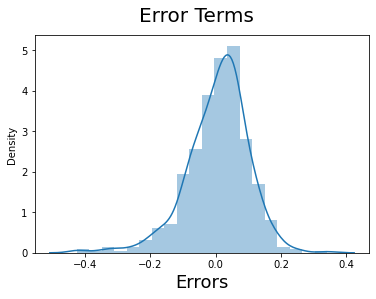

In [58]:
fig = plt.figure()
sns.distplot(res, bins = 20)
fig.suptitle('Error Terms', fontsize = 20)
plt.xlabel('Errors', fontsize = 18)
plt.show()

- This is a really nice **normal distribution** graph.
- Mean is 0

Text(0.5, 1.0, 'Residual plot')

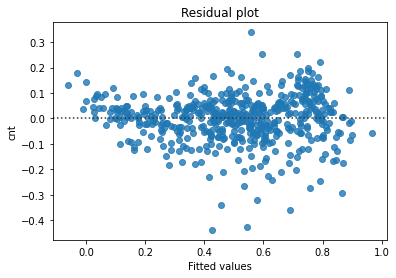

In [59]:
fig = plt.figure()
sns.residplot(y_train_pred, y_train)
plt.xlabel("Fitted values")
plt.title('Residual plot')   

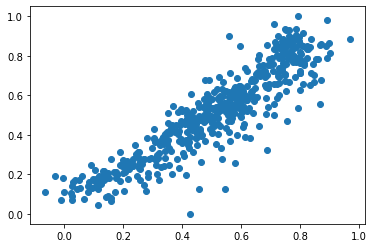

In [60]:
plt.scatter(y_train_pred, y_train)

## Step 5: Making predictions

#### Applying scale on test sets

In [61]:
df_test[rescale_vars] = scaler.transform(df_test[rescale_vars])

In [62]:
df_test.describe()

,yr,holiday,temp,hum,windspeed,cnt,spring,summer,winter,light+precipitation,...,dec,feb,jan,july,june,mar,may,nov,oct,sept
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,...,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.481818,0.036364,0.558718,0.638221,0.313293,0.522154,0.254545,0.263636,0.236364,0.027273,...,0.086364,0.100000,0.077273,0.104545,0.095455,0.054545,0.086364,0.072727,0.086364,0.086364
std,0.500809,0.187620,0.233187,0.148694,0.159584,0.219163,0.436599,0.441609,0.425817,0.163248,...,0.281541,0.300684,0.267633,0.306665,0.294512,0.227609,0.281541,0.260281,0.281541,0.281541
min,0.000000,0.000000,0.046591,0.261915,-0.042808,0.048205,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.355429,0.529197,0.198843,0.378595,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.558172,0.625590,0.300126,0.524678,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,0.755981,0.743798,0.402718,0.677750,1.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,0.984424,1.002146,0.807474,0.963300,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [63]:
y_test = df_test.pop("cnt")
X_test = df_test

In [64]:
X_test_sm = X_test[X_train_rfe.columns]

In [65]:
y_test_pred = lm.predict(X_test_sm)

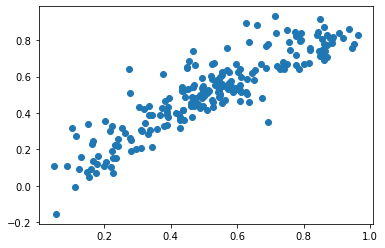

In [66]:
plt.scatter(y_test, y_test_pred)

In [67]:
print(r2_score(y_true=y_train, y_pred=y_train_pred))
print(r2_score(y_true=y_test, y_pred=y_test_pred))

0.8167242687794916
0.7916677951145898
